In [0]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

## Data loading:
> We are going to load the dengue fever data for analysis with the aid of Pandas' `read_csv()`function that parses the csv file(s) into pandas `DataFrames`. `train_features` holds the dengue fever **predictor variables** and `train_labels` holds the **target variable**i.e. the number of dengue fever cases

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# load the provided data
#train_features = pd.read_csv("train_features.csv", index_col=[0,1,2])

#train_labels = pd.read_csv("train_labels.csv", index_col=[0,1,2])

In [0]:
testing_filepath = "drive/My Drive/DataScience/DengueFever/Data/dengue_features_test.csv"
training_filepath = "drive/My Drive/DataScience/DengueFever/Data/dengue_features_train.csv"
training_cases_filepath = "drive/My Drive/DataScience/DengueFever/Data/dengue_labels_train.csv"

train_features = pd.read_csv(training_filepath, index_col=[0,1,2])
train_labels = pd.read_csv(training_cases_filepath, index_col=[0,1,2])
test_full = pd.read_csv(testing_filepath)

## Data Cleaning:
> In this part of our analysis, we aim at structuring the loaded data above. i.e `train_features` and `train_labels` for instance:  
*  checking for and imputing or dropping missing values.  
*  Doing away with duplicate data.  
    
Also given that our data is collected for two geographically different cities, we are going to analyze each city's spread of dengue fever independently. This is largely due to the fact that environment variables/factors for both cities are most likely not the same.

In [0]:
# Seperate data for San Juan
sj_train_features = train_features.loc["sj"]
sj_train_labels = train_labels.loc["sj"]

# Separate data for Iquitos
iq_train_features = train_features.loc["iq"]
iq_train_labels = train_labels.loc["iq"]

In [10]:
print("San Juan")
print("features: ", sj_train_features.shape)
print("labels  : ", sj_train_labels.shape)

print("\nIquitos")
print("features: ", iq_train_features.shape)
print("labels  : ", iq_train_labels.shape)

San Juan
features:  (936, 21)
labels  :  (936, 1)

Iquitos
features:  (520, 21)
labels  :  (520, 1)


In [11]:
sj_train_features.head()

week_start_date  ...  station_precip_mm
year weekofyear                  ...                   
1990 18              1990-04-30  ...               16.0
     19              1990-05-07  ...                8.6
     20              1990-05-14  ...               41.4
     21              1990-05-21  ...                4.0
     22              1990-05-28  ...                5.8

[5 rows x 21 columns]

In [0]:
# Remove `week_start_date` string.
sj_train_features.drop("week_start_date", axis=1, inplace=True)
iq_train_features.drop("week_start_date", axis=1, inplace=True)

In [14]:
#checking for missing values
pd.isnull(sj_train_features).sum()

ndvi_ne                                  191
ndvi_nw                                   49
ndvi_se                                   19
ndvi_sw                                   19
precipitation_amt_mm                       9
reanalysis_air_temp_k                      6
reanalysis_avg_temp_k                      6
reanalysis_dew_point_temp_k                6
reanalysis_max_air_temp_k                  6
reanalysis_min_air_temp_k                  6
reanalysis_precip_amt_kg_per_m2            6
reanalysis_relative_humidity_percent       6
reanalysis_sat_precip_amt_mm               9
reanalysis_specific_humidity_g_per_kg      6
reanalysis_tdtr_k                          6
station_avg_temp_c                         6
station_diur_temp_rng_c                    6
station_max_temp_c                         6
station_min_temp_c                         6
station_precip_mm                          6
dtype: int64

Text(0.5, 0, 'Time')

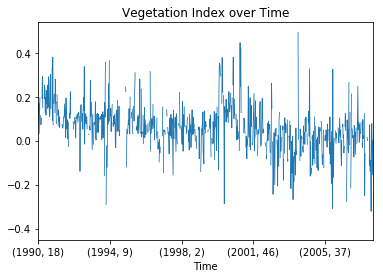

In [15]:
(sj_train_features
     .ndvi_ne
     .plot
     .line(lw=0.8))

plt.title("Vegetation Index over Time")
plt.xlabel("Time")

> The line plot above is of vegetation index over time for san juan and we can see breaks in the plots which signifies the presence of missing values.

In [0]:
#Imputing missing values
sj_train_features.fillna(method="ffill", inplace=True)
iq_train_features.fillna(method="ffill", inplace=True)

## Exploratory Data Analysis

<p>
Our target variable, total_cases is a non-negative integer, which implies we are looking to make some count predictions of the total dengue fever cases. Regression techniques for this type of prediction include;

* **Poisson regression**<br>
* **Negative binomial regression**<br>

Poisson regression fits according to the assumption that the mean and variance of the population distribution are equal. When they aren't, specifically when the variance is much larger than the mean, the negative binomial approach is better because the negative binomial regression simply lifts the assumption that the population mean and variance be equal, allowing for a larger class of possible models.
</p>

In [17]:
print("San Juan")
print("mean: ", sj_train_labels.mean()[0])
print("var :", sj_train_labels.var()[0])

print("\nIquitos")
print("mean: ", iq_train_labels.mean()[0])
print("var :", iq_train_labels.var()[0])

San Juan
mean:  34.18055555555556
var : 2640.045439691045

Iquitos
mean:  7.565384615384615
var : 115.8955239365642


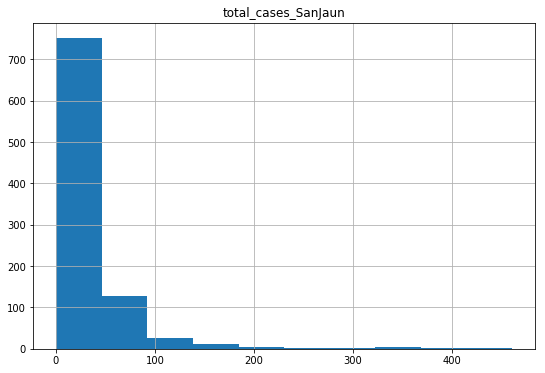

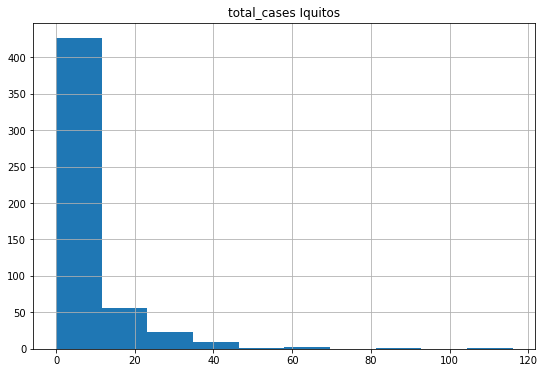

In [18]:
(sj_train_labels.hist(figsize=(9,6)))
plt.title("total_cases_SanJaun")
plt.savefig("sjskew.png")
(iq_train_labels.hist(figsize=(9,6)))
plt.title("total_cases Iquitos")
plt.savefig("skewness.png")

> From the histograms above, it can be seen that the total number of dengue fever cases are highly rightly-skewed for both cities implying that `mean > median > mode`. The presence of `outliers` is also noted by the extreme bins on both `hist`_plots

### Correlation analysis:
> We also need to investigate and quantify the relationship that exists between the various predictor variables and the target value (total_cases). This will paint a clear picture as to what variables contribute the most to the number of dengue fever cases.
* Correlation maps are useful when visualizing these relationships but we'll also make use of other plots like:
    * bar-histograms
    * scatter plots

In [0]:
sj_train_features['total_cases'] = sj_train_labels.total_cases
iq_train_features['total_cases'] = iq_train_labels.total_cases

In [0]:
# compute the correlations
sj_correlations = sj_train_features.corr()
iq_correlations = iq_train_features.corr()

Text(0.5, 1.0, 'San Juan Variable Correlations')

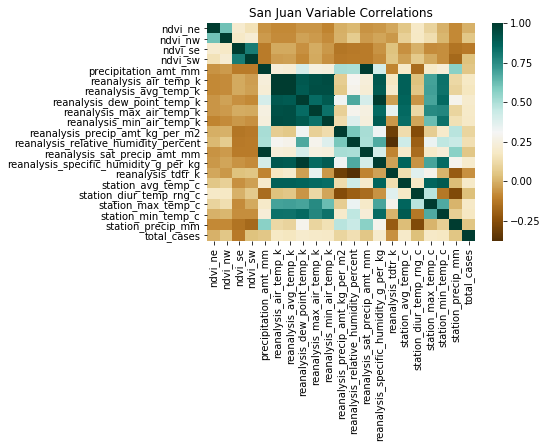

In [21]:
# plot san juan
sj_corr_heat = sns.heatmap(sj_correlations, cmap="BrBG")
plt.title('San Juan Variable Correlations')

Text(0.5, 1.0, 'Iquitos Variable Correlations')

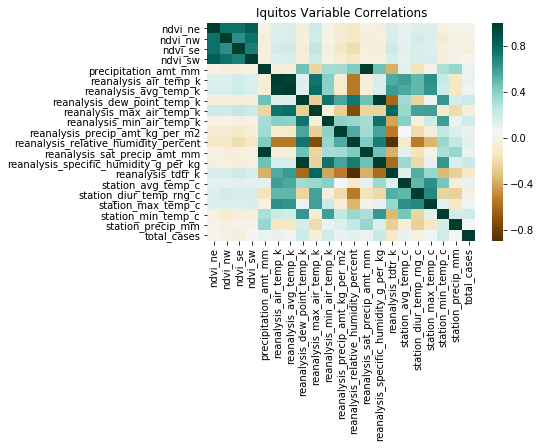

In [22]:
#plot iquitos
iq_corr_heat = sns.heatmap(iq_correlations, cmap="BrBG")
plt.title('Iquitos Variable Correlations')

<p>
Many of the temperature data are strongly correlated, but the total_cases variable doesn't have many obvious strong correlations.
Total_cases seems to only have weak correlations with other variables. Many of the climate variables are much more strongly correlated. The vegetation index also only has weak correlation with other variables.
</p>

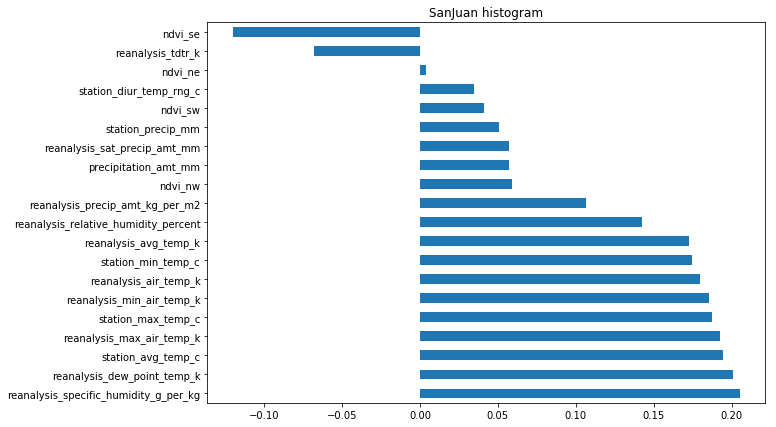

In [23]:
# San Juan
(sj_correlations
     .total_cases
     .drop("total_cases") # can't compare the variable under study to itself
     .sort_values(ascending=False)
     .plot
     .barh(figsize=(10,7)))
plt.title("SanJuan histogram")
plt.savefig("sjbarh.png")

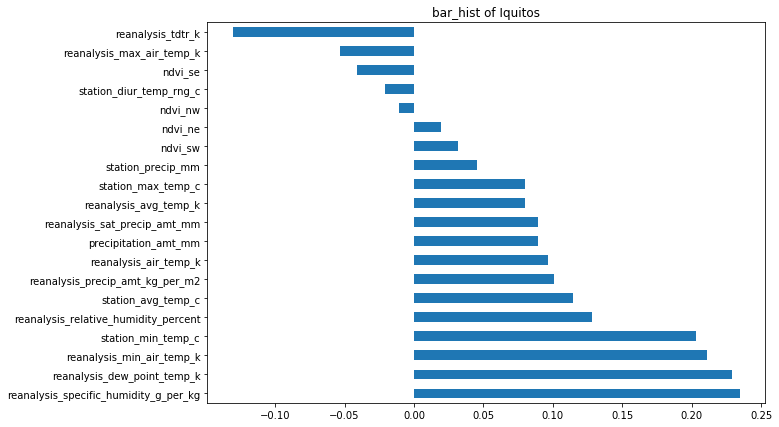

In [24]:
# Iquitos
(iq_correlations
     .total_cases
     .drop('total_cases') # can't compare the variable under study to itself
     .sort_values(ascending=False)
     .plot
     .barh(figsize=(10,7)))
plt.title("bar_hist of Iquitos")
plt.savefig("iq_barh.png")

<h4>A few insights</h4>

* **The wetter the better:**
The correlation strengths differ for each city, but it looks like reanalysis_specific_humidity_g_per_kg and reanalysis_dew_point_temp_k are the most strongly correlated with total_cases. This makes sense as we know mosquitoes thrive in wet climate, the wetter the better!

* **Hot and heavy:**
As minimum temperatures, maximum temperatures, and average temperatures rise, the total_cases of dengue fever tend to rise as well.

* **precipitation:**
The precipitation measurements bear little to no correlation to total_cases, despite strong correlations to the humidity measurements, as evident by the heatmaps above.

### The scatter plots' case:
> Scatter plots unlike correlation heatmaps are more specific since they only depict the relationship (correlation) between two variables and we'll put them to work to assert the above made observations.

> Scatter plots also aid in outlier detection in that points far away from the majority points are outliers.

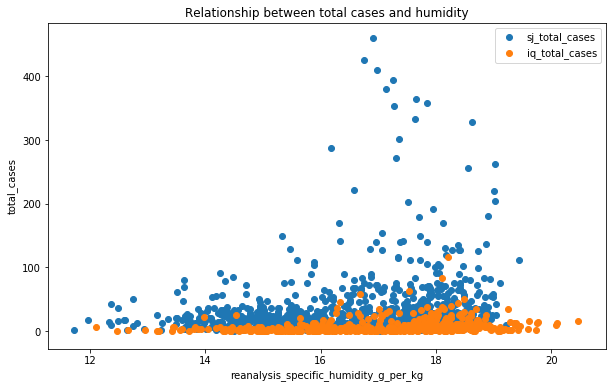

In [25]:
fig,ax = plt.subplots(figsize=(10,6))
ax.scatter(sj_train_features.reanalysis_specific_humidity_g_per_kg, sj_train_features.total_cases)
ax.scatter(iq_train_features.reanalysis_specific_humidity_g_per_kg, iq_train_features.total_cases)
plt.legend(("sj_total_cases", "iq_total_cases"))
plt.xlabel("reanalysis_specific_humidity_g_per_kg")
plt.ylabel("total_cases")
plt.title("Relationship between total cases and humidity")
plt.savefig("ins1.png")

> From the above scatter plot the total dengue fever cases for both `SanJuan` and `Iquitos` have a low positive correlation with `reanalysis_specific_humidity` and sanjuan has more extreme cases of dengue fever `(outliers)`

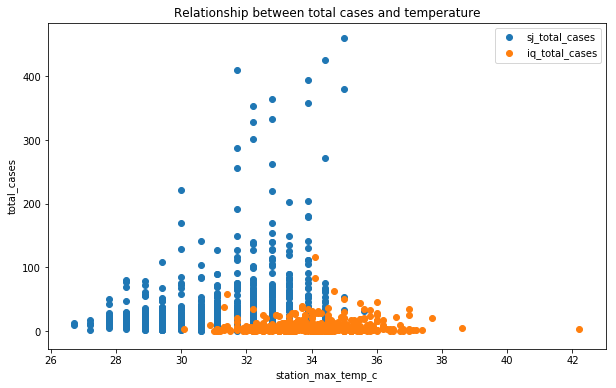

In [26]:
fig,ax = plt.subplots(figsize=(10,6))
ax.scatter(sj_train_features.station_max_temp_c, sj_train_features.total_cases)
ax.scatter(iq_train_features.station_max_temp_c, iq_train_features.total_cases)
plt.legend(("sj_total_cases", "iq_total_cases"))
plt.xlabel("station_max_temp_c")
plt.ylabel("total_cases")
plt.title("Relationship between total cases and temperature")
plt.savefig("ins2.png")

In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

x = np.array(sj_train_features['reanalysis_specific_humidity_g_per_kg']).reshape(-1,1)
y = np.array(sj_train_features.total_cases)

model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
slope = model.coef_
print(f"Slope: {slope}")

Slope: [6.7602879]


## Bundling up the cleaning into a one-step process

In [0]:
def preprocess_data(data_path, labels_path=None):
    # load data and set index to city, year, weekofyear
    df = pd.read_csv(data_path, index_col=[0, 1, 2])
    
    # select features we want
    features = ['reanalysis_specific_humidity_g_per_kg', 
                 'reanalysis_dew_point_temp_k', 
                 'station_avg_temp_c', 
                 'station_min_temp_c']
    df = df[features]
    
    # fill missing values
    df.fillna(method='ffill', inplace=True)

    # add labels to dataframe
    if labels_path:
        labels = pd.read_csv(labels_path, index_col=[0, 1, 2])
        df = df.join(labels)
    
    # separate san juan and iquitos
    sj = df.loc['sj']
    iq = df.loc['iq']
    
    return sj, iq

## Linear regression Model

In [0]:
train_full = pd.read_csv(training_filepath)
cases = pd.read_csv(training_cases_filepath)
test_full = pd.read_csv(testing_filepath)

In [45]:
train_full.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [0]:
train_full['month'] = pd.to_datetime(train_full.week_start_date).dt.month
test_full['month'] = pd.to_datetime(test_full.week_start_date).dt.month

In [0]:
train_full['month'] = pd.to_datetime(train_full.week_start_date).dt.month
test_full['month'] = pd.to_datetime(test_full.week_start_date).dt.month

In [0]:
train = train_full.drop(['week_start_date', 'city'], axis=1)
test = test_full.drop(['week_start_date', 'city'], axis=1)

In [0]:
y = cases.total_cases
X = train

In [0]:
from sklearn.model_selection import train_test_split
# Split data into training and testing data sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [51]:
X_train.shape

(1164, 23)

In [0]:
from sklearn.impute import SimpleImputer
si = SimpleImputer()
linear_model = LinearRegression()

In [0]:
imputed_X_train = pd.DataFrame(si.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(si.transform(X_valid))

imputed_X_train.columns = X_train.columns 
imputed_X_valid.columns = X_valid.columns 

In [59]:
linear_model.fit(imputed_X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
predictions = linear_model.predict(imputed_X_valid)

In [0]:
from sklearn.metrics import mean_absolute_error

In [65]:
mae = mean_absolute_error(predictions, y_valid) 
print(mae)

22.122635093954464
